<a href="https://colab.research.google.com/github/kandkurteram/course-v3/blob/master/RamK_PeopleFaces_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

In [5]:
base_dir

'/content/gdrive/My Drive/fastai-v3/'

In [0]:
from fastai.vision import *

In [0]:
#classes = ['Ram','Dipti','Vatsal', 'Ishwari', 'Suresh', 'Prasad', 'Yogesh', 'Vihan']

In [8]:
path = Path(base_dir + 'data/People/Train')
print(path)

/content/gdrive/My Drive/fastai-v3/data/People/Train


In [0]:
#for c in classes:
  #print(c)
  #file = 'urls_' + c + '.csv'
  #print(file)
  #dest = path/c
  #print(dest)
  #download_images(path/file, dest, max_pics=200)
  #verify_images(path/c, delete=True, max_size = 500)

In [0]:
tfms = get_transforms(do_flip=True, flip_vert=True)

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=tfms, size=224, num_workers=4, bs=32).normalize(imagenet_stats)

In [14]:
data.classes

['Dipti', 'Ishwari', 'Prasad', 'Ram', 'Suresh', 'Vatsal', 'Vihan', 'Yogesh']

In [0]:
#data.show_batch(rows=3, figsize=(7,8))

In [16]:
len(data.train_ds)

151

In [17]:
len(data.valid_ds)

37

In [18]:
learn = cnn_learner(data, models.resnet50, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 97.7MB/s]


In [19]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.841123,3.054834,0.810811,00:40
1,2.136024,2.420419,0.486486,00:15
2,1.635010,1.129913,0.243243,00:14
3,1.382256,0.781755,0.216216,00:14


In [20]:
learn.save('stage-1', return_path=True)

PosixPath('/content/gdrive/My Drive/fastai-v3/data/People/Train/models/stage-1.pth')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
#interp.plot_top_losses(10, figsize=(10,8))

In [23]:
interp.most_confused(min_val=2)

[('Vatsal', 'Dipti', 3)]

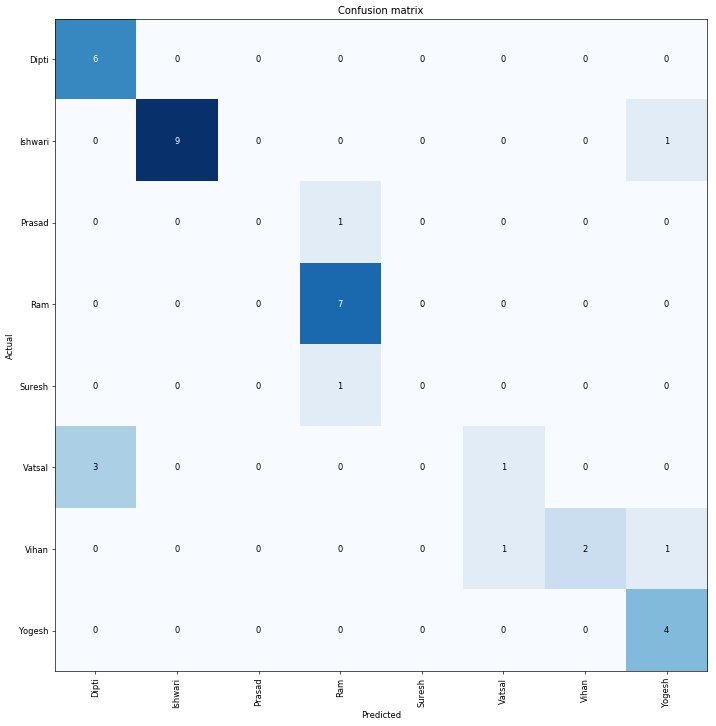

In [24]:
interp.plot_confusion_matrix(figsize=(12, 12), dpi=60)

In [0]:
learn.unfreeze()

In [26]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


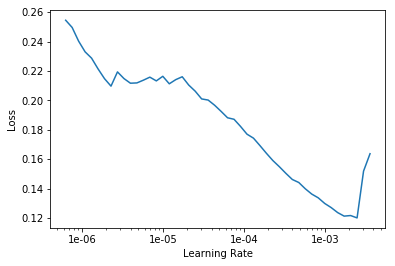

In [0]:
learn.recorder.plot()

In [28]:
learn.fit_one_cycle(2, max_lr=slice(5e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.514719,0.788258,0.189189,00:15
1,0.476053,0.797058,0.189189,00:13


In [0]:
learn.save('stage-2', return_path=True)

PosixPath('/content/gdrive/My Drive/fastai-v3/data/People/Train/models/stage-2.pth')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

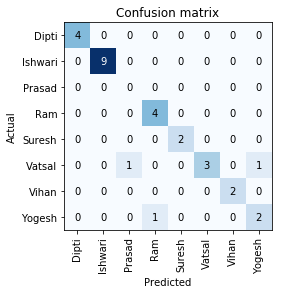

In [0]:
interp.plot_confusion_matrix()

In [0]:
learn.export()

In [0]:
#defaults.device = torch.device('cpu')

In [0]:
TestFolderPath = Path(base_dir + 'data/People/Test')
print(TestFolderPath)

/content/gdrive/My Drive/fastai-v3/data/People/Test


In [0]:
learn = load_learner(path)

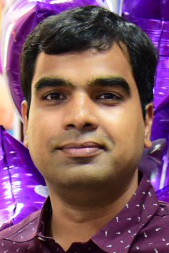

In [0]:
img = open_image(TestFolderPath/'16.jpg')
img

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class


Category Yogesh

In [0]:
#['Dipti', 'Ishwari', 'Prasad', 'Ram', 'Suresh', 'Vatsal', 'Vihan', 'Yogesh']

In [0]:
outputs

tensor([1.2736e-03, 5.7070e-04, 3.4358e-03, 3.5342e-03, 9.3021e-04, 1.5888e-03,
        2.3333e-03, 9.8633e-01])